In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

In [10]:
sys.path.append(os.path.abspath(os.path.join('..')))
from src.models.CVAE import CVAELitModule

model_mse = CVAELitModule.load_from_checkpoint(
    r"D:\felix-ml\logs\train\runs\CVAE_mse_loss\checkpoints\last.ckpt")

model_bce = CVAELitModule.load_from_checkpoint(
    r"D:\felix-ml\logs\train\runs\2023-07-27_08-10-37\checkpoints\last.ckpt")

data_dir = "../data/FDP/"

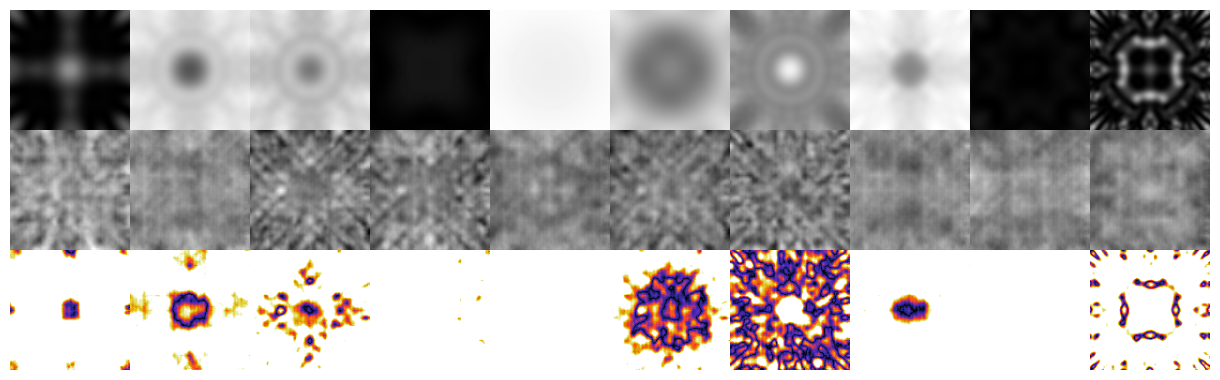

In [16]:
sample_size = 10
CISD_codes = os.listdir(data_dir)

structures = np.concatenate([
    np.load(os.path.join(data_dir, ICSD_code, ICSD_code + "_structure.npy")
    ) for ICSD_code in np.random.choice(CISD_codes, sample_size)], axis=0)
patterns = np.concatenate([np.clip(
    np.load(os.path.join(data_dir, ICSD_code, ICSD_code + "_+0+0+0.npy")
    ), 0.0, 1.0) for ICSD_code in np.random.choice(CISD_codes, sample_size)], axis=0)

structure_tensor = torch.from_numpy(structures).float().clone().detach().view(sample_size, 1, 128, 128).cuda()
pattern_tensor = torch.from_numpy(patterns).float().clone().detach().view(sample_size, 1, 128, 128).cuda()
random_tensor = torch.rand(sample_size, 1, 128, 128).cuda()

z1 = model.encoder1(random_tensor)[0]

z2_mse = model_mse.encoder2(structure_tensor)[0]
z_mse = torch.cat([z1, z2_mse], 1)
fake_mse = model.decoder(z_mse)

z2_bce = model_mse.encoder2(structure_tensor)[0]
z_bce = torch.cat([z1, z2_bce], 1)
fake_bce = model.decoder(z_bce)

# loss, fake = model.model_step((pattern_tensor.cuda(), structure_tensor.cuda()))

# z = model.encoder(pattern_tensor.cuda())[0]
# fake = model.decoder(z)

predictions = fake_mse.view(sample_size * 128, 128).detach().cpu().numpy()

# print([float(loss_function(pattern_tensor[x], predictions_tensor[x])) for x in range(10)])

patterns = patterns - np.min(patterns)
patterns = patterns * (1 / np.max(patterns))
predictions = predictions - np.min(predictions)
predictions = predictions * (1 / np.max(predictions))
difference = np.abs(predictions - patterns)
difference = np.clip(5 * difference, 0.0, 1.0)

fig = plt.figure(figsize=(25, 4))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 

for i, (ax, img) in enumerate(zip([plt.subplot(gs[0, 0]), plt.subplot(gs[1, 0]), plt.subplot(gs[2, 0])],
                   [patterns.T, predictions.T, difference.T])):
    ax.imshow(img, cmap=("CMRmap" if i==2 else "gray"))
    ax.set_axis_off()

plt.show()


In [4]:
sample_size = 10
CISD_codes = os.listdir(data_loc)

patterns = np.concatenate([np.clip(np.fromfile(
    os.path.join(data_loc, code, code+"_+0+0+0.bin"),
    dtype=np.float64), 0.0, 1.0).reshape((128, 128)) for code in np.random.choice(CISD_codes, sample_size)], axis=0)
patterns_tensor = torch.from_numpy(patterns).to(torch.float32).clone().detach().view(sample_size, 1, 128, 128)
reconstructions_tensor, mu, logvar = model.forward(patterns_tensor)
reconstructions = reconstructions_tensor.view(sample_size * 128, 128).detach().numpy()

patterns = patterns - np.min(patterns)
patterns = patterns * (1 / np.max(patterns))
reconstructions = reconstructions - np.min(reconstructions)
reconstructions = reconstructions * (1 / np.max(reconstructions))
difference = np.abs(reconstructions - patterns)
difference = np.clip(5 * difference, 0.0, 1.0)

fig = plt.figure(figsize=(25, 4))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 

for i, (ax, img) in enumerate(zip([plt.subplot(gs[0, 0]), plt.subplot(gs[1, 0]), plt.subplot(gs[2, 0])],
                   [patterns.T, reconstructions.T, difference.T])):
    ax.imshow(img, cmap=("CMRmap" if i==2 else "gray"))
    ax.set_axis_off()

plt.show()


NameError: name 'data_loc' is not defined